<a href="https://colab.research.google.com/github/Bhuvan068/FUTURE_ML_02/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Spotify_data.xlsx to Spotify_data.xlsx


In [ ]:
import pandas as pd
import numpy as np

print("Libraries imported successfully")

df = pd.read_excel("Spotify_data.xlsx")

print("Dataset loaded successfully")


Libraries imported successfully
Dataset loaded successfully


In [ ]:
df.head()


Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No                             NaN   
4                      No                             NaN   

  preferred_listening_content fav_music_genre music_time_slot  \
0                     Podcast          Melody           Night   
1                     Podcast             Rap       Afternoon   
2                     Podcast             Pop           Night   
3                       Music          Melody           Night   
4                       Music          Melody           Night   

                              music_Influencial_mood  \
0                              Sadness or melancholy   
1                       Social gatherings or parties   
2                       Relaxation and stress relief   
3  Relaxation and stress relief, Social gathering...   
4                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                   NaN   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                    NaN   
2            Interview                     NaN                   Both   
3                  NaN                     NaN                    NaN   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

In [ ]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)


Shape: (520, 20)

Columns:
 Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [ ]:
df['churn'] = df['premium_sub_willingness'].apply(
    lambda x: 1 if x.strip().lower() == 'no' else 0
)


In [ ]:
df[['premium_sub_willingness', 'churn']].head(10)


premium_sub_willingness  churn
0                     Yes      0
1                     Yes      0
2                     Yes      0
3                      No      1
4                      No      1
5                      No      1
6                      No      1
7                      No      1
8                     Yes      0
9                      No      1

In [ ]:
df['churn'].value_counts()


churn
1    334
0    186
Name: count, dtype: int64

In [ ]:
df['churn'].value_counts(normalize=True) * 100


churn
1    64.230769
0    35.769231
Name: proportion, dtype: float64

In [ ]:
df.isnull().sum()


Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
churn                            0
dtype: int64

In [ ]:
df = df.dropna(axis=1, how='all')


In [ ]:
df.shape


(520, 21)

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()


In [ ]:
df = df.drop_duplicates()


In [ ]:
df.shape


(519, 21)

In [ ]:
df = df.drop(columns=['premium_sub_willingness'])


In [ ]:
X = df.drop(columns=['churn'])
y = df['churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (519, 19)
Target shape: (519,)


In [ ]:
X.head()


Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

           preffered_premium_plan preferred_listening_content fav_music_genre  \
0        Family Plan-Rs 179/month                     Podcast          Melody   
1  Individual Plan- Rs 119/ month                     Podcast             Rap   
2        Student Plan-Rs 59/month                     Podcast             Pop   
3                             nan                       Music          Melody   
4                             nan                       Music          Melody   

  music_time_slot                             music_Influencial_mood  \
0           Night                              Sadness or melancholy   
1       Afternoon                       Social gatherings or parties   
2           Night                       Relaxation and stress relief   
3           Night  Relaxation and stress relief, Social gathering...   
4           Night                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                   nan   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                    nan   
2            Interview                     nan                   Both   
3                  nan                     nan                    nan   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

print("Categorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)


Categorical Columns:
 ['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']

Numerical Columns:
 ['music_recc_rating']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)


In [ ]:
X_encoded = preprocessor.fit_transform(X)
print("Encoded feature shape:", X_encoded.shape)


Encoded feature shape: (519, 164)


In [ ]:
encoded_feature_names = preprocessor.get_feature_names_out()
print("Total encoded features:", len(encoded_feature_names))


Total encoded features: 164


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (415, 164)
Test shape: (104, 164)


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Logistic Regression trained successfully")


Logistic Regression trained successfully


In [ ]:
y_pred = log_model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7115384615384616

Confusion Matrix:
 [[28  9]
 [21 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.76      0.65        37
           1       0.84      0.69      0.75        67

    accuracy                           0.71       104
   macro avg       0.70      0.72      0.70       104
weighted avg       0.74      0.71      0.72       104



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=10,          # Optional: prevent overfitting
    class_weight='balanced' # Important for churn class imbalance
)

rf_model.fit(X_train, y_train)
print("Random Forest trained successfully")


Random Forest trained successfully


In [ ]:
y_rf_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))


Accuracy: 0.7596153846153846

Confusion Matrix:
 [[29  8]
 [17 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70        37
           1       0.86      0.75      0.80        67

    accuracy                           0.76       104
   macro avg       0.75      0.77      0.75       104
weighted avg       0.78      0.76      0.76       104



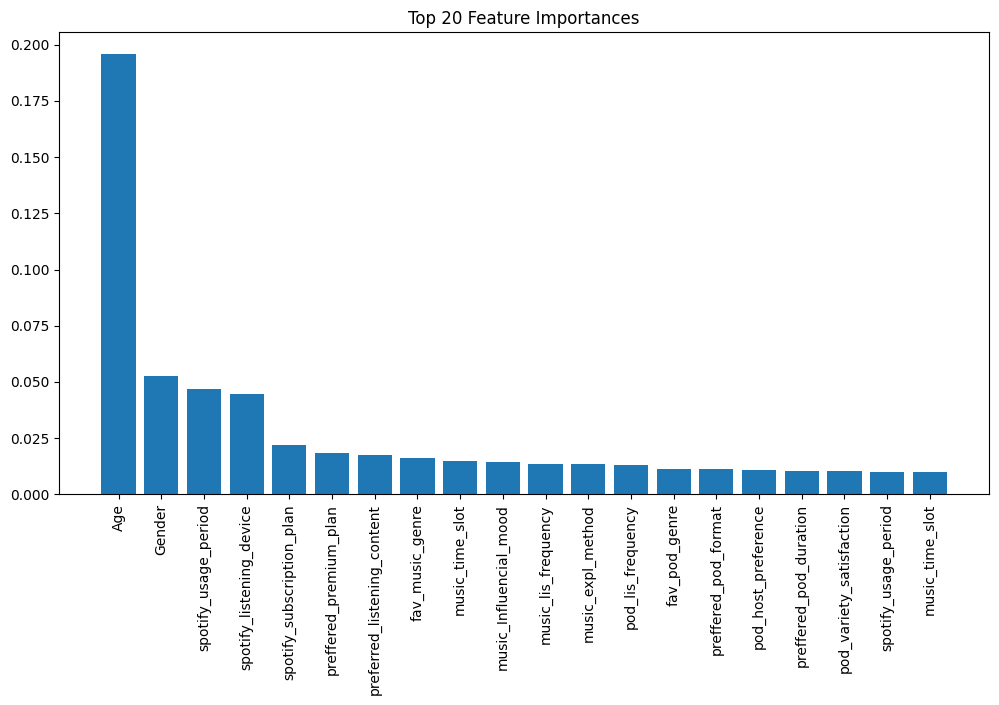

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # descending order

plt.figure(figsize=(12,6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), [categorical_cols + ['spotify_usage_period','music_time_slot','music_lis_frequency','pod_lis_frequency']][0][:20], rotation=90)
plt.show()


In [ ]:
# Predict churn probabilities for the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]  # probability of class 1 (churn)


In [ ]:
import pandas as pd

risk_df = pd.DataFrame({
    'Customer_ID': range(len(X_test)),  # use 0,1,2,... as customer IDs
    'Churn_Probability': y_prob
})

# Define risk categories
risk_df['Risk_Level'] = pd.cut(
    risk_df['Churn_Probability'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Low', 'Medium', 'High']
)

risk_df.head(10)


Customer_ID  Churn_Probability Risk_Level
0            0           0.227929        Low
1            1           0.969511       High
2            2           0.572864     Medium
3            3           0.508354     Medium
4            4           0.391943     Medium
5            5           0.953900       High
6            6           0.544950     Medium
7            7           0.410385     Medium
8            8           0.554303     Medium
9            9           0.568108     Medium

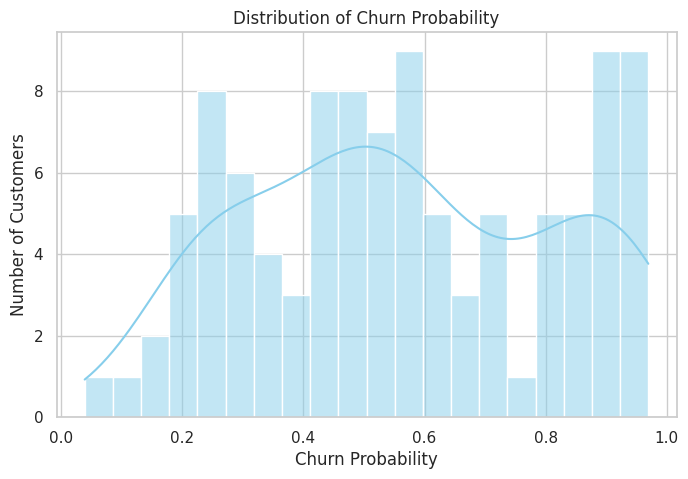

/tmp/ipython-input-2324809050.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Level', data=risk_df, palette='Set2')


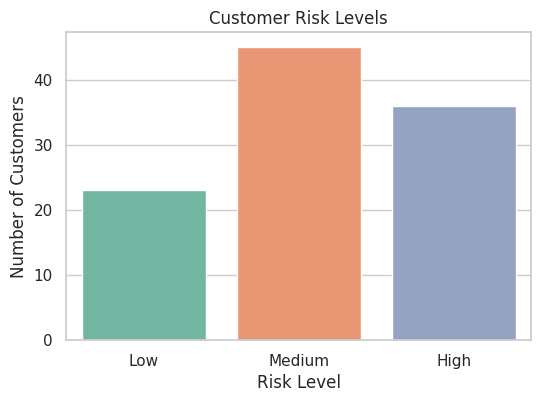

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1️⃣ Distribution of churn probability
plt.figure(figsize=(8,5))
sns.histplot(risk_df['Churn_Probability'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

# 2️⃣ Count of customers in each Risk Level
plt.figure(figsize=(6,4))
sns.countplot(x='Risk_Level', data=risk_df, palette='Set2')
plt.title('Customer Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Get feature importances from trained RF model
importances = rf_model.feature_importances_

# 2️⃣ Create DataFrame with correct feature names
feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
})

# 3️⃣ Sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# 4️⃣ Display top 20 important features
print(feature_importance_df.head(20))


                                               Feature  Importance
33                     cat__preffered_premium_plan_nan    0.195758
28   cat__spotify_subscription_plan_Premium (paid s...    0.052597
27   cat__spotify_subscription_plan_Free (ad-suppor...    0.046893
31   cat__preffered_premium_plan_Individual Plan- R...    0.044526
163                       remainder__music_recc_rating    0.021725
30   cat__preffered_premium_plan_Family Plan-Rs 179...    0.018544
58   cat__music_Influencial_mood_Sadness or melancholy    0.017310
32   cat__preffered_premium_plan_Student Plan-Rs 59...    0.016008
34              cat__preferred_listening_content_Music    0.014938
35            cat__preferred_listening_content_Podcast    0.014424
12    cat__spotify_listening_device_Computer or laptop    0.013607
29   cat__preffered_premium_plan_Duo plan- Rs 149/m...    0.013282
159                   cat__pod_variety_satisfaction_Ok    0.013075
155                 cat__preffered_pod_duration_Longer    0.01

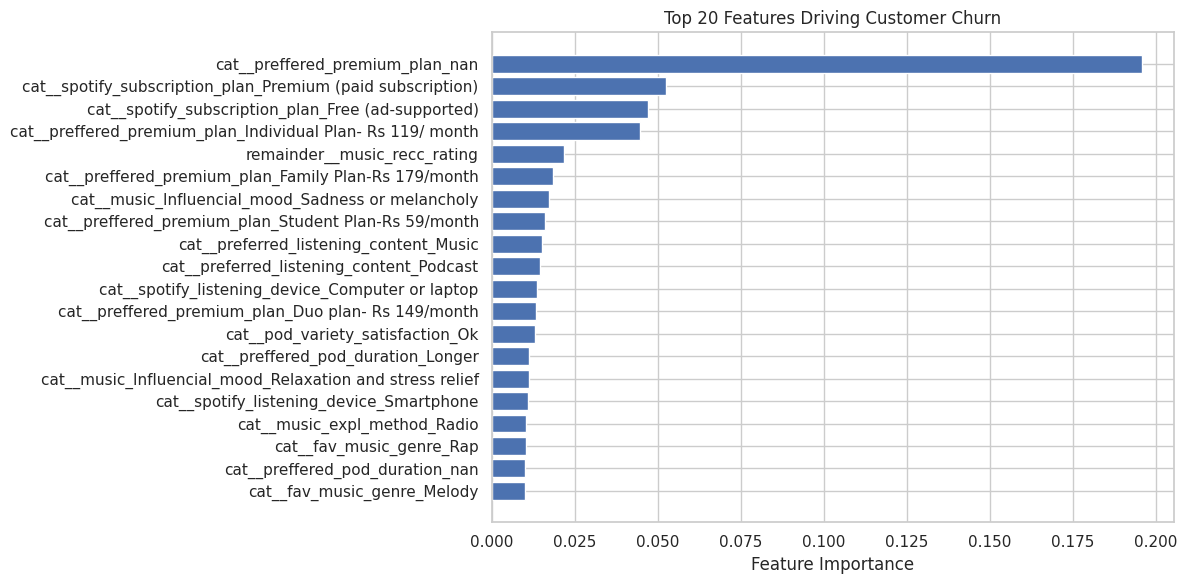

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(
    feature_importance_df['Feature'][:20][::-1],
    feature_importance_df['Importance'][:20][::-1]
)
plt.xlabel("Feature Importance")
plt.title("Top 20 Features Driving Customer Churn")
plt.tight_layout()
plt.show()


In [ ]:
import joblib


In [ ]:
joblib.dump(rf_model, "spotify_churn_model.pkl")
print("Random Forest model saved as spotify_churn_model.pkl")


Random Forest model saved as spotify_churn_model.pkl


In [ ]:
joblib.dump(preprocessor, "spotify_preprocessor.pkl")
print("Preprocessor saved as spotify_preprocessor.pkl")


Preprocessor saved as spotify_preprocessor.pkl


In [ ]:
joblib.dump(encoded_feature_names, "spotify_feature_names.pkl")
print("Feature names saved")


Feature names saved


In [ ]:
from google.colab import files

files.download("spotify_churn_model.pkl")
files.download("spotify_preprocessor.pkl")
files.download("spotify_feature_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 1️⃣ Import libraries
import joblib
import pandas as pd

# 2️⃣ File paths
model_path = "/content/drive/MyDrive/spotify_churn_model.pkl"
preprocessor_path = "/content/drive/MyDrive/spotify_preprocessor.pkl"
feature_names_path = "/content/drive/MyDrive/spotify_feature_names.pkl"

# 3️⃣ Load all files with joblib
model = joblib.load(model_path)
preprocessor = joblib.load(preprocessor_path)
feature_names = joblib.load(feature_names_path)

print("Model, preprocessor, and feature names loaded successfully ✅")



Model, preprocessor, and feature names loaded successfully ✅


In [ ]:
# Check type of each object
print(type(model))
print(type(preprocessor))
print(type(feature_names))

# Look at the feature names
print(feature_names)

# For the model, you can see the classes it predicts
print(model.classes_)

# For the preprocessor, you can see which transformers it has
print(preprocessor)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.compose._column_transformer.ColumnTransformer'>
<class 'numpy.ndarray'>
['cat__Age_12-20' 'cat__Age_20-35' 'cat__Age_35-60' 'cat__Age_6-12'
 'cat__Age_60+' 'cat__Gender_Female' 'cat__Gender_Male'
 'cat__Gender_Others' 'cat__spotify_usage_period_1 year to 2 years'
 'cat__spotify_usage_period_6 months to 1 year'
 'cat__spotify_usage_period_Less than 6 months'
 'cat__spotify_usage_period_More than 2 years'
 'cat__spotify_listening_device_Computer or laptop'
 'cat__spotify_listening_device_Computer or laptop, Smart speakers or voice assistants'
 'cat__spotify_listening_device_Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'cat__spotify_listening_device_Computer or laptop, Wearable devices'
 'cat__spotify_listening_device_Smart speakers or voice assistants'
 'cat__spotify_listening_device_Smart speakers or voice assistants, Wearable devices'
 'cat__spotify_listening_device_Smartphone'
 'cat

In [ ]:
import pandas as pd

# Categorical features used by preprocessor
categorical_cols = ['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
                    'spotify_subscription_plan', 'preffered_premium_plan',
                    'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
                    'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
                    'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
                    'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']

# Numeric columns passed through
numeric_cols = ['music_recc_rating']

# Example user input
user_input = {
    "Age": "20-35",
    "Gender": "Male",
    "spotify_usage_period": "1 year to 2 years",
    "spotify_listening_device": "Smartphone",
    "spotify_subscription_plan": "Premium (paid subscription)",
    "preffered_premium_plan": "Individual Plan- Rs 119/ month",
    "preferred_listening_content": "Music",
    "fav_music_genre": "Pop",
    "music_time_slot": "Evening",
    "music_Influencial_mood": "Happy",
    "music_lis_frequency": "Daily",
    "music_expl_method": "Recommended",
    "pod_lis_frequency": "Daily",
    "fav_pod_genre": "News",
    "preffered_pod_format": "Audio",
    "pod_host_preference": "Single Host",
    "preffered_pod_duration": "30min",
    "pod_variety_satisfaction": "High",
    "music_recc_rating": 5
}

# Fill missing categorical columns with 'Unknown'
for col in categorical_cols:
    if col not in user_input:
        user_input[col] = "Unknown"

# Fill missing numeric columns with 0
for col in numeric_cols:
    if col not in user_input:
        user_input[col] = 0

# Convert to DataFrame
input_data = pd.DataFrame([user_input])

# Transform and predict
X = preprocessor.transform(input_data)
prediction = model.predict(X)
probability = model.predict_proba(X)[:, 1]

print("Churn Prediction (0=No, 1=Yes):", prediction[0])
print("Churn Probability:", probability[0])


Churn Prediction (0=No, 1=Yes): 0
Churn Probability: 0.05700393077165633


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok


In [ ]:
from google.colab import files
files.upload()


Saving spotify_churn_model.pkl to spotify_churn_model (1).pkl
Saving spotify_feature_names.pkl to spotify_feature_names (1).pkl
Saving spotify_preprocessor.pkl to spotify_preprocessor (1).pkl


{'spotify_churn_model (1).pkl': b'\x80\x04\x95\x91\x03\x00\x00\x00\x00\x00\x00\x8c\x18sklearn.ensemble._forest\x94\x8c\x16RandomForestClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\testimator\x94\x8c\x15sklearn.tree._classes\x94\x8c\x16DecisionTreeClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\tcriterion\x94\x8c\x04gini\x94\x8c\x08splitter\x94\x8c\x04best\x94\x8c\tmax_depth\x94N\x8c\x11min_samples_split\x94K\x02\x8c\x10min_samples_leaf\x94K\x01\x8c\x18min_weight_fraction_leaf\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cmax_features\x94N\x8c\x0emax_leaf_nodes\x94N\x8c\x0crandom_state\x94N\x8c\x15min_impurity_decrease\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cclass_weight\x94N\x8c\tccp_alpha\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\rmonotonic_cst\x94N\x8c\x10_sklearn_version\x94\x8c\x051.6.1\x94ub\x8c\x0cn_estimators\x94Kd\x8c\x10estimator_params\x94(h\x0bh\x0fh\x10h\x11h\x12h\x13h\x14h\x16h\x15h\x18h\x19t\x94\x8c\tbootstrap\x94\x88\x8c\toob_score\x94\x89\x8c\x06n_jobs\x94Nh\x15K*\x8c\x07verbose

In [ ]:
%%writefile app.py
import streamlit as st
import joblib

st.set_page_config(page_title="Spotify Churn Dashboard", layout="centered")

st.title("🎧 Spotify Customer Churn Prediction")
st.write("Model loaded successfully")

# Load model files
model = joblib.load("spotify_churn_model.pkl")
preprocessor = joblib.load("spotify_preprocessor.pkl")

st.success("Model & Preprocessor Loaded ✅")


Writing app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("37mwzBFWMitNDYzWFjgbk5nqAAp_7yiSjNnjeft3W6djU1wgL")


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Spotify Churn Dashboard", layout="centered")

st.title("🎧 Spotify Customer Churn Prediction Dashboard")

# Load saved files
model = joblib.load("spotify_churn_model.pkl")
preprocessor = joblib.load("spotify_preprocessor.pkl")
feature_names = joblib.load("spotify_feature_names.pkl")

# =========================
# 1️⃣ CUSTOMER INPUT FORM
# =========================
st.header("🔮 Predict Customer Churn")

with st.form("churn_form"):
    Age = st.selectbox("Age Group", ["20-35", "12-20", "35-60", "Others"])
    Gender = st.selectbox("Gender", ["Male", "Female", "Others"])
    spotify_usage_period = st.selectbox(
        "Usage Period",
        ["Less than 6 months", "6 months to 1 year", "1 year to 2 years", "More than 2 years"]
    )
    spotify_listening_device = st.selectbox(
        "Listening Device",
        ["Smartphone", "Computer or laptop", "Smart speakers or voice assistants"]
    )
    spotify_subscription_plan = st.selectbox(
        "Subscription Plan",
        ["Free (ad-supported)", "Premium (paid subscription)"]
    )
    music_lis_frequency = st.selectbox(
        "Music Listening Frequency",
        ["Daily", "Several times a week", "Once a week", "Rarely"]
    )
    music_recc_rating = st.slider("Music Recommendation Rating", 1, 5, 3)

    submit = st.form_submit_button("Predict Churn")

if submit:
    input_data = pd.DataFrame([{
        "Age": Age,
        "Gender": Gender,
        "spotify_usage_period": spotify_usage_period,
        "spotify_listening_device": spotify_listening_device,
        "spotify_subscription_plan": spotify_subscription_plan,
        "music_lis_frequency": music_lis_frequency,
        "music_recc_rating": music_recc_rating
    }])

    for col in preprocessor.feature_names_in_:
        if col not in input_data.columns:
            input_data[col] = "Unknown"

    X = preprocessor.transform(input_data)
    churn_prob = model.predict_proba(X)[0][1]

    if churn_prob < 0.33:
        risk = "🟢 Low Risk"
    elif churn_prob < 0.66:
        risk = "🟡 Medium Risk"
    else:
        risk = "🔴 High Risk"

    st.subheader("Prediction Result")
    st.metric("Churn Probability", f"{churn_prob:.2%}")
    st.write("Risk Level:", risk)

# =========================
# 2️⃣ FEATURE IMPORTANCE
# =========================
st.header("📊 Top Churn Drivers")

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

fig1, ax1 = plt.subplots()
ax1.barh(top_features[::-1], top_importances[::-1])
ax1.set_xlabel("Importance Score")
ax1.set_title("Top 10 Features Influencing Churn")

st.pyplot(fig1)

# =========================
# 3️⃣ MODEL EVALUATION
# =========================
st.header("📈 Model Evaluation Metrics")

col1, col2, col3, col4 = st.columns(4)

col1.metric("Accuracy", "0.76")
col2.metric("Precision", "0.86")
col3.metric("Recall", "0.75")
col4.metric("F1-Score", "0.80")

st.subheader("Confusion Matrix")

cm = np.array([[29, 8],
               [17, 50]])

fig2, ax2 = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")
ax2.set_title("Confusion Matrix")

st.pyplot(fig2)


Overwriting app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
# Kill ngrok tunnel from OS
!pkill -f ngrok
